# Уровень заработной платы

#### **Информация о данных**

Используемый набор данных является выборкой из базы данных переписи населения 1994 года, сделанной Барри Беккером. Датасет содержит следующие признаки:

1. **Возраст** (`age`): отражает возраст респондента (от 17 до 90 лет).
2. **Рабочий класс** (`workclass`): отражает статус занятости респондента.
3. **Оценка уникальности** (`fnlwgt`): отражает примерную оценку количества людей, которое представляет каждая строка данных.
4. **Образование** (`education`): отражает уровень образования респондента.
5. **Ступень образования** (`education-num`): отражает статус образования от дошкольного до докторантуры (от 1 до 16).
6. **Семейное положение** (`marital-status`): отражает семейное положение респондента.
7. **Сфера занятости** (`occupation`): отражает сферу занятости респондента.
8. **Семейная роль** (`relationship`): отражает роль в семье респондента.
9. **Раса** (`race`): отражает расовую принадлежность респондента.
10. **Пол** (`sex`): отражает пол респондента (мужчина, женщина).
11. **Прирост капитала** (`capital-gain`): отражает увеличение капитала у респондента.
12. **Потеря капитала** (`capital-loss`): отражает уменьшение капитала у респондента.
13. **Трудоспособность** (`hours-per-week`): отражает количество отработанных часов за неделю (от 1 до 99).
14. **Страна рождения** (`native-country`): отражает страну, в которой родился респондент.
15. **Зарплата** (`salary`): отражает уровень заработной платы респондента (<=50K, >50K).

#### **Описание задачи**

*Задача заключается в прогнозировании уровеня заработной платы.*

В данной работе требуется проанализировать исходные данные, выяснить какие признаки оказывают наиболее сильное влияние на уровень заработной платы, применить различные алгоритмы классификации, которые смогут предсказывать уровень заработной платы по входным в данным.

> Источник данных: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification


## **1. Чтение данных**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
url = r"C:\Users\79960\МашинноеОбучение_ннгу_2023\ML_unn\salary.csv"
data_raw = pd.read_csv(url)
data_raw.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


##  **2. Визуализация данных**

> В данном разделе мы выполним визуализацию данных, чтобы понять зависимость уровня заработной платы от различных признаков, а также убедиться в наличии или отсутствии выбросов


In [3]:
dr = data_raw.copy()
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


*Простроим графическое представление матрицы корреляции*

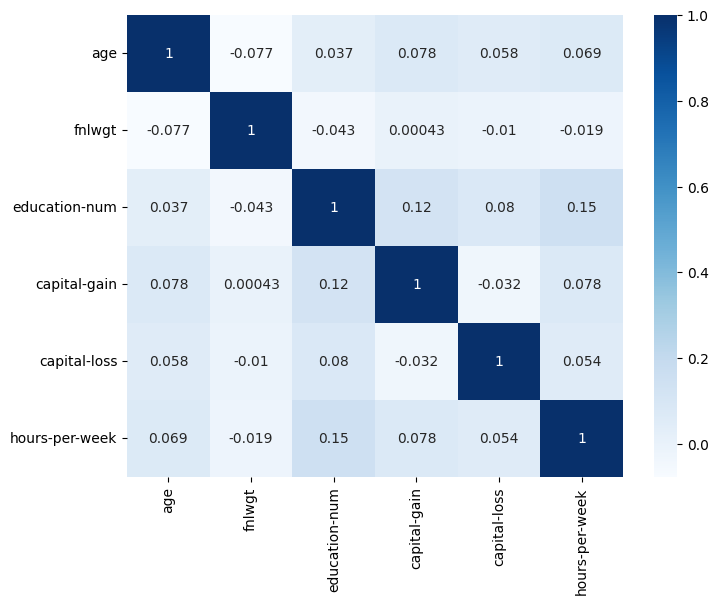

In [6]:
numeric_parameters = [column for column in dr.columns if dr[column].dtype.name != 'object']
data = dr[numeric_parameters]
plt.figure(figsize = (8,6))
sb.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

Как результат, признаки практически не коррелируют друг с другом.

In [7]:
color = ["#3498db","#34495e"]
sb.set_palette(color)

*Посмотрим на какой возраст приходится наибольший заработок*

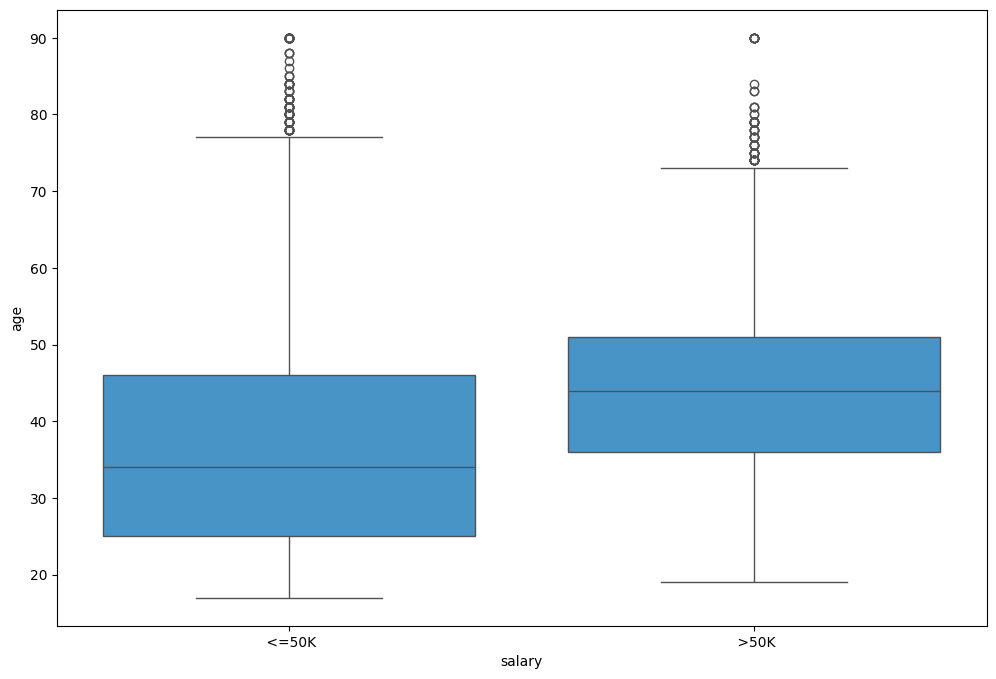

In [8]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=dr, y='age', x='salary')
plt.show()

Можно увидеть, что среди опрошенных, у которых зарплата более 50К, преобладают люди в возрасте примерно от 35 до 50. Зарплату менее 50К получают люди примерно от 25 до 45.

*Посмотрим зависимость заработной платы от характеристики, которая обозначает количество людей со схожими признаками*

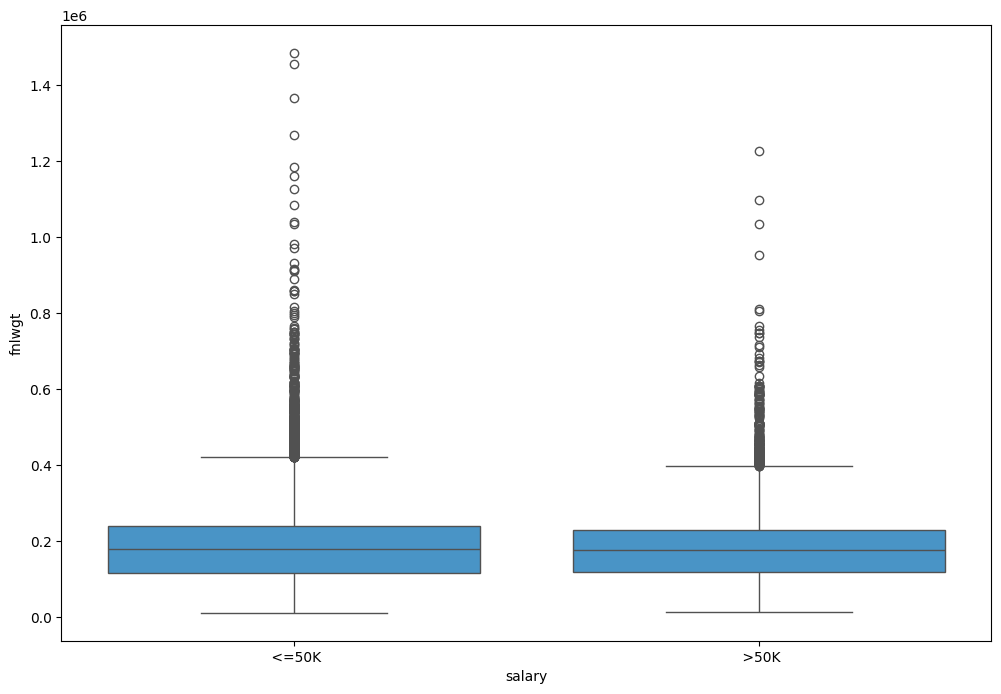

In [9]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=dr, y='fnlwgt', x='salary')
plt.show()

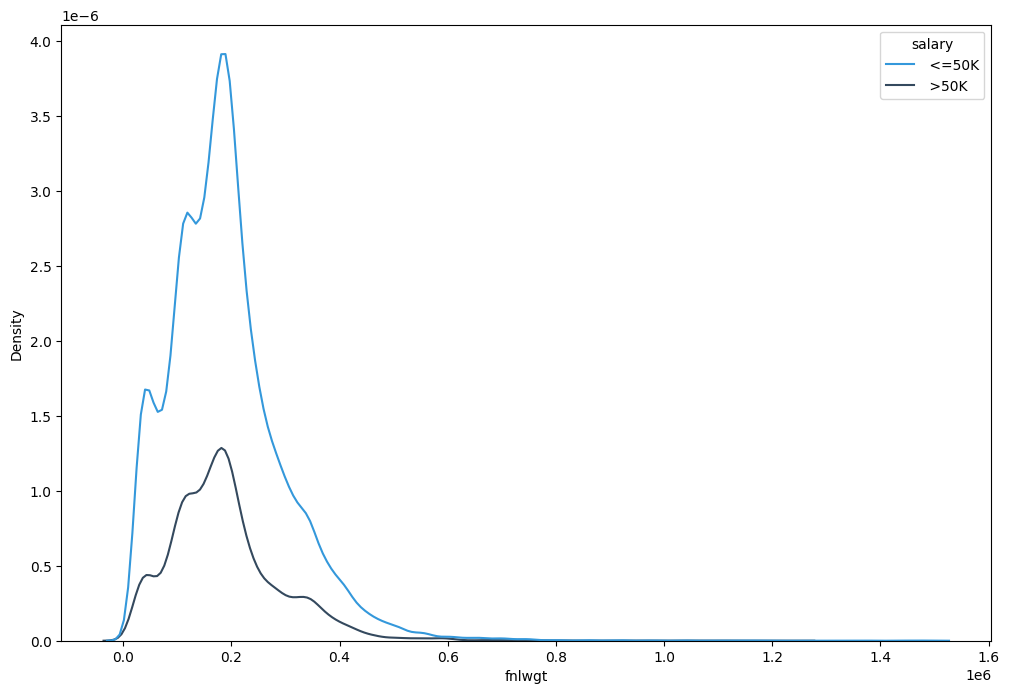

In [10]:
plt.figure(figsize=(12, 8))
sb.kdeplot(data=dr, x='fnlwgt', hue='salary')
plt.show()

Трудно разглядеть зависимость зарплаты от данного признака. Попробуем отбросить его при дальнейшей обработке данных.

*Посмотрим распределение заработной платы по принадлежности к рабочему классу*

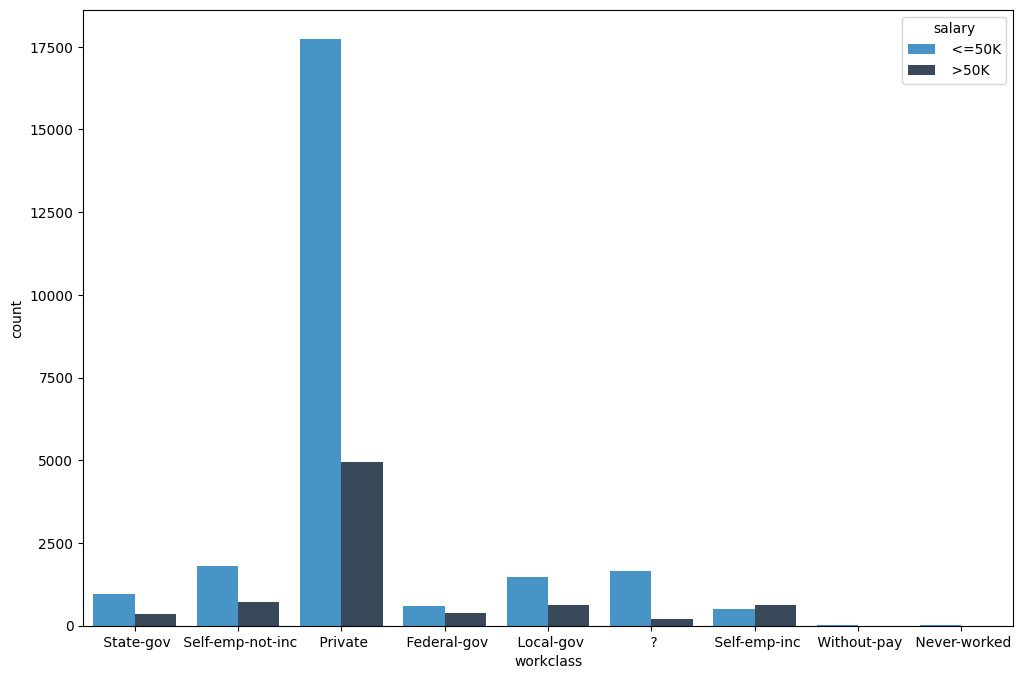

In [11]:
plt.figure(figsize=(12, 8))
sb.countplot(data=dr, x='workclass', hue='salary')
plt.show()

Среди людей рабочего класса можем наблюдать наибольшее количество людей, которые получают зарплату более 50К, кроме того данный класс преобладает и среди тех, кто пролучает зарплату менее 50К. 

*Посмотрим распределение заработной платы среди уровня образования*

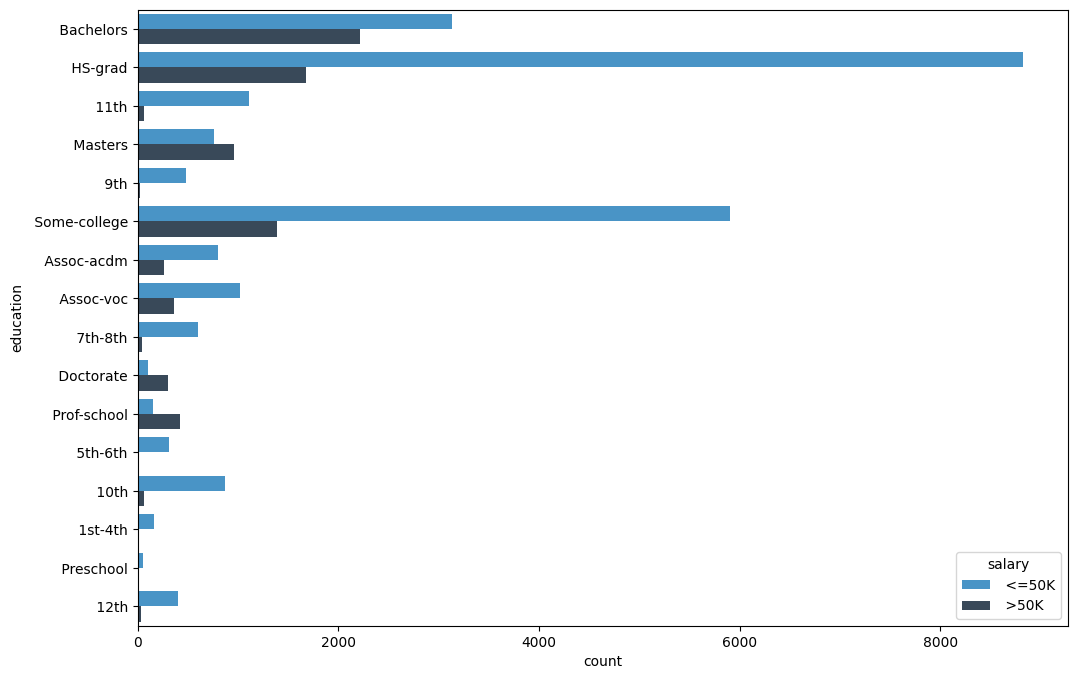

In [12]:
plt.figure(figsize=(12, 8))
sb.countplot(data=dr, y='education', hue='salary')
plt.show()

## **3. Анализ данных**

In [13]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
dr.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

*В таблице отсутствуют пропущенные данные числовых признаков!*

### **3.1. Числовые признаки**

In [15]:
numeric_parameters

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [16]:
data = dr[numeric_parameters]

Имеем **6** числовых признаков. Посмотрим их основные характеристики

In [17]:
dr.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


В таблице представлены основые статистические характеристики:

* Количество (`count`)
* Медиана (`mean`)
* Среднеквадратическое отклонение (`std`)
* Минимум (`min`)
* Квантиль 25%
* Квантиль 50% 
* Квантиль 75% 
* Максимум (`max`)

На данном этапе можно заметить странное распределение в признаках *capital-gain* и *capital-loss*. Скорее всего это связано с тем, что данные признаки равняются нулю для большиства опрошенных. Все остальные характеристики выглядят достаточно правдоподобно.

### **3.2. Категориальные признаки**

Выделим среди всех признаков — категориальные

In [31]:
category_parameters = [column for column in dr.columns if dr[column].dtype.name == 'object']
category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

Имеем **9** категориальных признаков. Рассмотрим распределение каждого из данных признаков.

In [32]:
for col in [column for column in dr.columns if dr[column].dtype.name == 'object']:
    print(f"{col} DISTRIBUTION")
    print(dr[col].value_counts())
    print()

workclass DISTRIBUTION
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

education DISTRIBUTION
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

marital-status DISTRIBUTION
marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Na

Просматривая полученные значения, можно заметить, что среди категориальных признаков **workclass**, **occupation**, **native-country** имеются пропущенные данные, которые обозначаются **' ?'**. Произведем замену данных значений на NaN (Not a Number).

In [33]:
dr['workclass'].replace(' ?', np.nan, inplace=True)
dr['occupation'].replace(' ?', np.nan, inplace=True)
dr['native-country'].replace(' ?', np.nan, inplace=True)

##  **4. Борьба с пропущенными значениями**

In [18]:
dr.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Существуют различные способы борьбы с пропусками. Самый примитивный — просто удалить те строки, в которых встречаются пропущенные значения. Так как датасет содержит не особо большое количество строк, то удаление пропущенных данных может привести к неточности дальнейшего исследования, поэтому способом заполнения пропусков будет *поиск наиболее популярных значений среди данного признака.* Посмотрим на часть датасета с пропусками:

In [19]:
dr_with_nan = dr[dr['workclass'].isnull()]
dr_with_nan.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


В данной выборке можно разглядеть, что везде, где отсутствует признак workclass, также отсутствует и признак occupation. Возможно между ними имеется некая связь. Поэтому найдем наиболее популярное значение признака **workclass** и затем по найденному значению выберем самое популярное среди **occupation**. Значения для признака **native-country**	заполним аналогично — наиболее популярным.

In [20]:
dr['workclass'].mode()[0]

' Private'

In [21]:
dr['occupation'][dr['workclass'] == dr['workclass'].mode()[0]].mode()[0]

' Craft-repair'

In [22]:
dr['native-country'].mode()[0]

' United-States'

In [23]:
dr['workclass'].fillna(dr['workclass'].mode()[0], inplace=True)
dr['occupation'].fillna(dr['occupation'][dr['workclass'] == dr['workclass'].mode()[0]].mode()[0], inplace=True)
dr['native-country'].fillna(dr['native-country'].mode()[0], inplace=True)

In [24]:
dr.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

##  **5. Обработка данных**

#### **5.1. Обработка числовых признаков**

In [25]:
numeric_parameters

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

Отбросим числовые признаки, которые имеют слишком большое число выбросов (*capital-gain*, *capital-gain*) или дублируют друг друга (*education-num*)

In [26]:
dr.drop('fnlwgt', axis=1, inplace=True)
dr.drop('education-num', axis=1, inplace=True)
dr.drop('capital-gain', axis=1, inplace=True)
dr.drop('capital-loss', axis=1, inplace=True)

К оставшимся числовым признакам применим **нормализацию**. В данном случае воспользуемся методом `MinMaxScaler()` из библиотеки scikit-learn, который нормализует значения, приводя их к диапазону от 0 до 1

In [27]:
remaining_numeric_parameters = [column for column in dr.columns if dr[column].dtype.name != 'object']
remaining_numeric_parameters

['age', 'hours-per-week']

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dr[remaining_numeric_parameters] = scaler.fit_transform(dr[remaining_numeric_parameters])

In [29]:
dr.describe()

,age,hours-per-week
count,32561.000000,32561.000000
mean,0.295639,0.402423
std,0.186855,0.125994
min,0.000000,0.000000
25%,0.150685,0.397959
50%,0.273973,0.397959
75%,0.424658,0.448980
max,1.000000,1.000000


#### **5.2. Обработка категориальных признаков**

In [34]:
category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

Найдем среди категориальных признаков те, которые можно отнести к бинарным и заменим их значения на *0* или *1* соответственно

In [35]:
binary_category_parameters = [column for column in category_parameters if len(dr[column].unique()) == 2]
binary_category_parameters

['sex', 'salary']

In [36]:
for column in binary_category_parameters:
  dr[column] = dr[column].map({dr[column].unique()[0]: 0, dr[column].unique()[1]: 1})

Теперь выберем признаки, которые нельзя классифицировать как бинарные

In [37]:
no_binary_category_parameters = [column for column in category_parameters if column not in binary_category_parameters]
no_binary_category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'native-country']

Применим к ним **векторизацию** — каждый из категориальных признаков, который нельзя отнести к бинарным, заменим на столько новых булевых признаков, сколько существует возможных категорий у данного признака). Данную функциональность представляет метод `get_dummies` из библиотеки Pandas.

In [38]:
dr=pd.get_dummies(dr, columns=no_binary_category_parameters, drop_first=True)
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 94 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         32561 non-null  float64
 1   sex                                         32561 non-null  int64  
 2   hours-per-week                              32561 non-null  float64
 3   salary                                      32561 non-null  int64  
 4   workclass_ Local-gov                        32561 non-null  bool   
 5   workclass_ Never-worked                     32561 non-null  bool   
 6   workclass_ Private                          32561 non-null  bool   
 7   workclass_ Self-emp-inc                     32561 non-null  bool   
 8   workclass_ Self-emp-not-inc                 32561 non-null  bool   
 9   workclass_ State-gov                        32561 non-null  bool   
 10  workclass_

#### **5.2. Устранение несбалансированности**

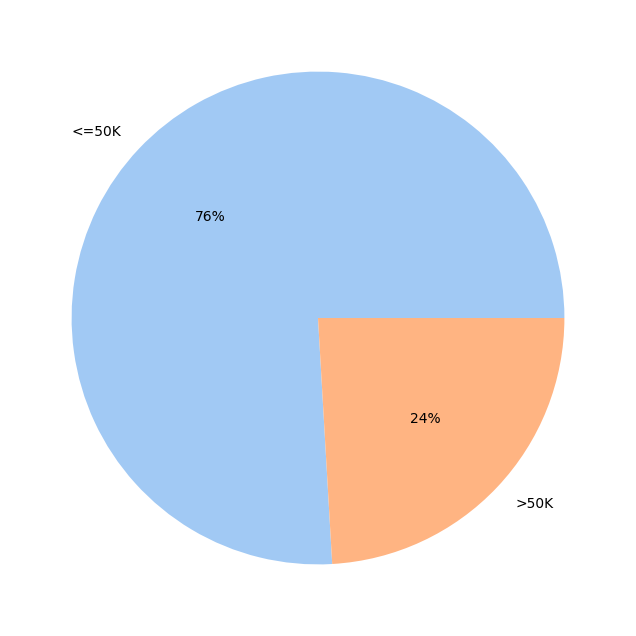

In [39]:
plt.figure(figsize=(8, 8))
colors = sb.color_palette('pastel')
labels = ['<=50K', ">50K"]
plt.pie([dr['salary'].value_counts()[0], dr['salary'].value_counts()[1]], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

In [40]:
conda install -c conda-forge imbalanced-learn

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       h56e8100_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    imbalanced-learn-0.12.4    |     pyhd8ed1ab_0         155 KB  conda-forge
    openssl-3.3.2              |       h2466b09_0         8.0 MB  conda-forge
    ucrt-10.0.22621.0          |       h57928b3_1         547 KB  conda-forge
    vc14_runtime-14.40.33810   |      hcc2c482_22         733 KB  conda-forge
    vs2015_runtime-14.40.33810 |      h3bf8584_22          17 KB  conda-forge
    ------------------------------------------------------------
   

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X = dr.iloc[:, dr.columns != 'salary']
y = dr['salary']

smote=SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

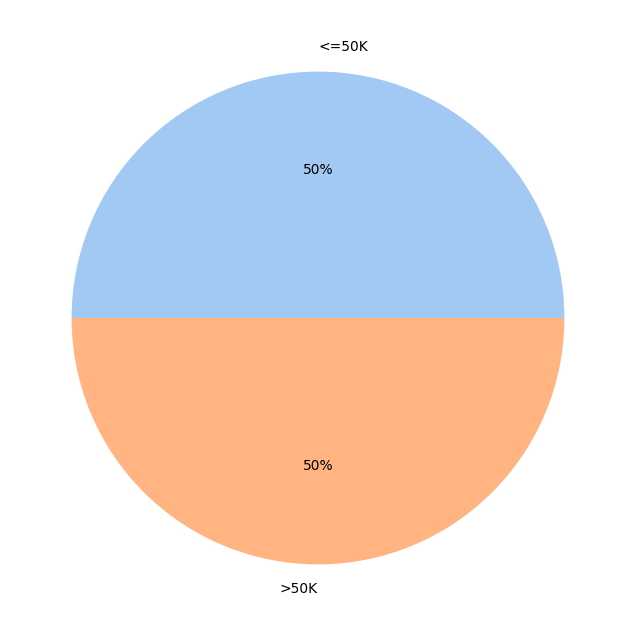

In [43]:
plt.figure(figsize=(8, 8))
colors = sb.color_palette('pastel')
labels = ['<=50K', ">50K"]
plt.pie([y_resampled.value_counts()[0], y_resampled.value_counts()[1]], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()